In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('cardekho_dataset.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [19]:
df.shape

(15411, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [21]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [22]:
df.drop(columns='Unnamed: 0', inplace=True)

15411


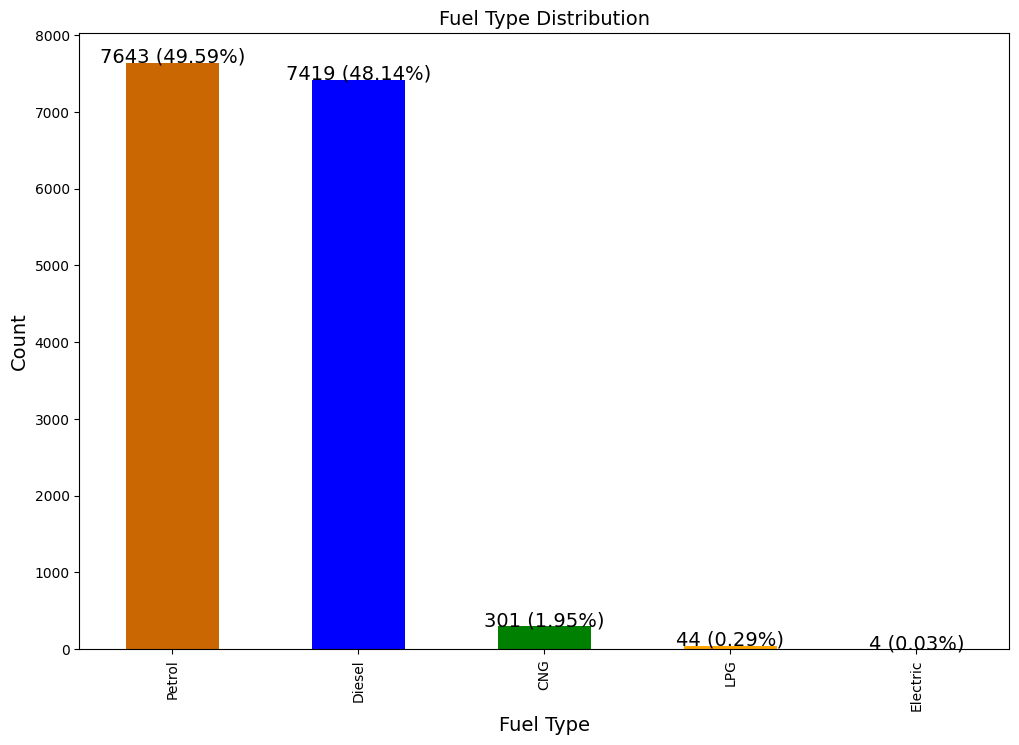

In [23]:
fuel_type_counts = df['fuel_type'].value_counts()
total_count = fuel_type_counts.sum()
print(total_count)
percentage = (fuel_type_counts/total_count)*100

custom_color = {'Petrol':'#ca6702',
                 'Diesel':'blue',
                 'CNG':'green',
                 'LPG':'orange',
                 'Electric':'#006400'}

plt.figure(figsize=(12,8))
ax = fuel_type_counts.plot(kind='bar', color=[custom_color.get(x,'gray') for x in fuel_type_counts.index])

for i,v in enumerate(fuel_type_counts):
    ax.text(i, v+0.2, f'{v} ({percentage[i]:.2f}%)', ha='center', fontsize=14)

plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Fuel Type Distribution', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Brand Count Distribution')

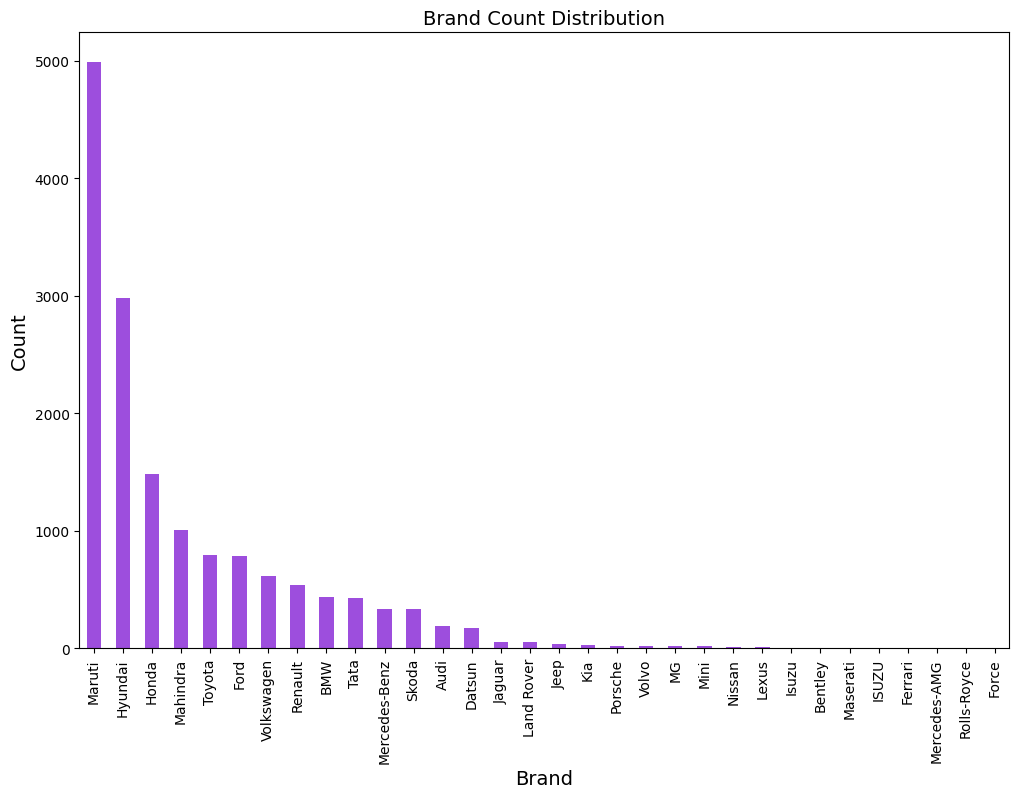

In [24]:
plt.figure(figsize=(12,8))
df['brand'].value_counts().plot(kind='bar', color='#9d4edd')

plt.xlabel('Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Brand Count Distribution', fontsize=14)

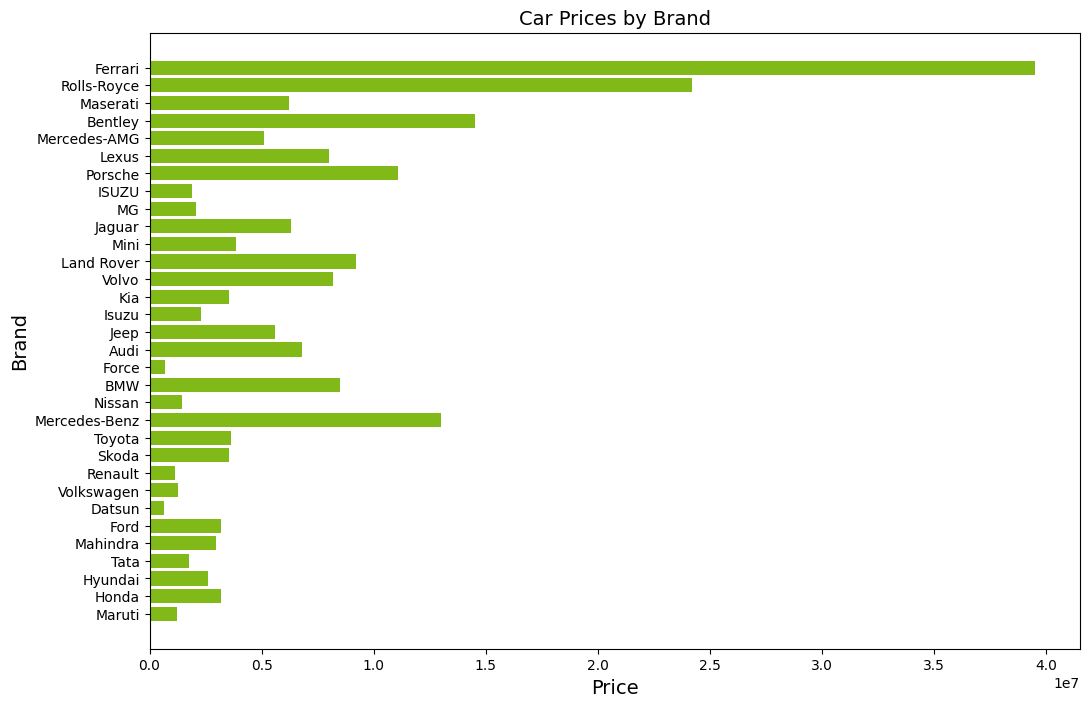

In [25]:
plt.figure(figsize=(12, 8))

df_sorted = df.sort_values(by='selling_price', ascending=True)

plt.barh(df_sorted['brand'], df_sorted['selling_price'], color='#80b918')

plt.xlabel('Price', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.title('Car Prices by Brand', fontsize=14)

plt.show()

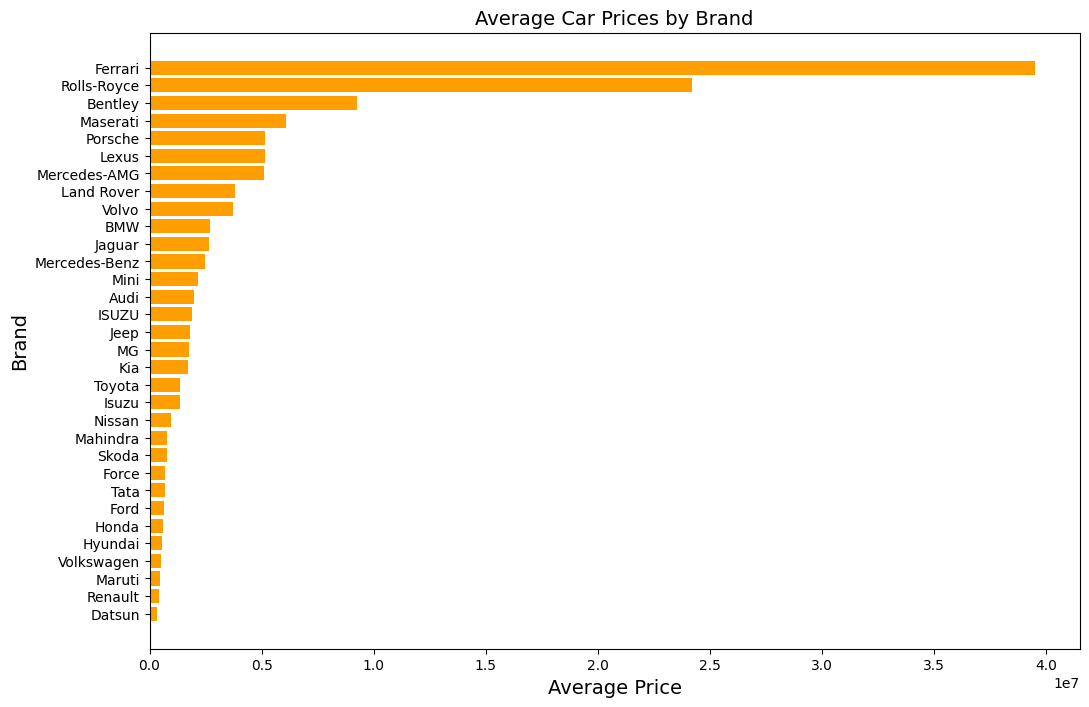

In [26]:
plt.figure(figsize=(12, 8))

average_prices = df.groupby('brand')['selling_price'].mean().sort_values()

plt.barh(average_prices.index, average_prices, color='#ff9e00')

plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.title('Average Car Prices by Brand', fontsize=14)

plt.show()

In [27]:
df['seller_type'].value_counts()

Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: seller_type, dtype: int64

Text(0.5, 1.0, 'Seller Distribution')

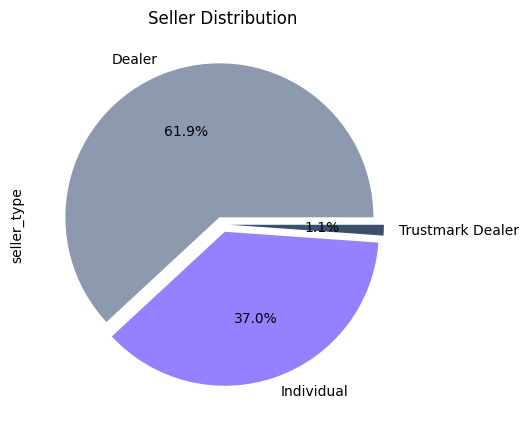

In [28]:
plt.figure(figsize=(11,5))
custom_color = ['#8d99ae','#9381ff','#3a506b']
df['seller_type'].value_counts().plot(kind='pie', autopct='%.1f%%', explode=[0.05,0.05,0.05], colors=custom_color)
plt.title('Seller Distribution')

In [29]:
df['transmission_type'].value_counts()

Manual       12225
Automatic     3186
Name: transmission_type, dtype: int64

Text(0.5, 1.0, 'Transmission Distribution')

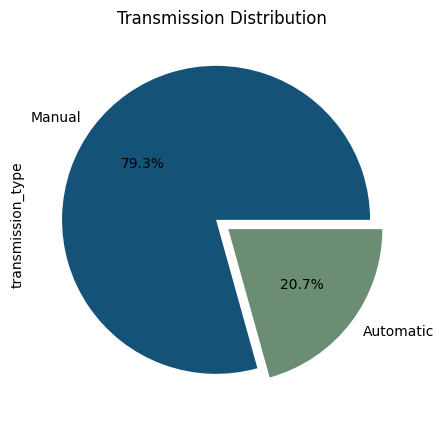

In [30]:
plt.figure(figsize=(11,5))
custom_color = ['#145277', '#6a8d73']
df['transmission_type'].value_counts().plot(kind='pie', autopct='%.1f%%', explode=[0.05,0.05], colors=custom_color)
plt.title('Transmission Distribution')

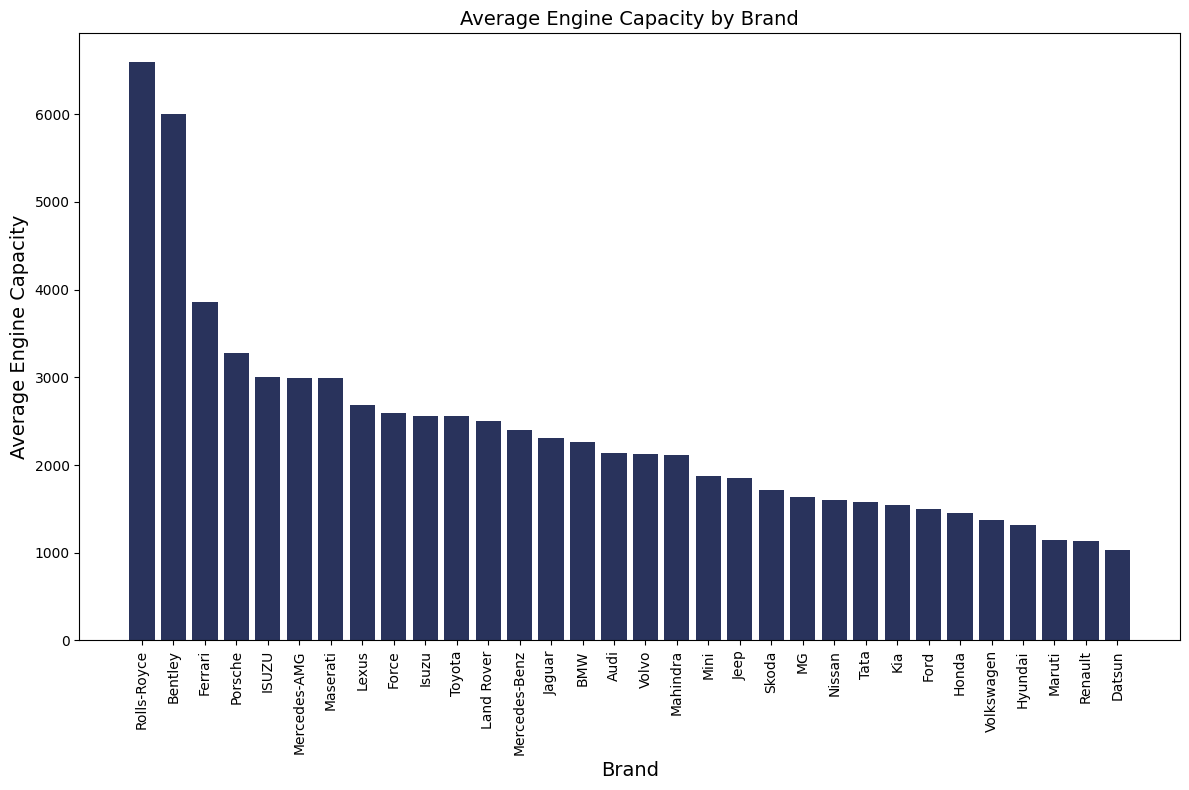

In [31]:
plt.figure(figsize=(12, 8))

# Assuming 'engine' is the engine capacity or size
df_grouped = df.groupby('brand')['engine'].mean().reset_index().sort_values(by='engine', ascending=False)

plt.bar(df_grouped['brand'], df_grouped['engine'], color='#29335c')

plt.xlabel('Brand', fontsize=14)
plt.ylabel('Average Engine Capacity', fontsize=14)
plt.title('Average Engine Capacity by Brand', fontsize=14)

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()